# 1. Organizing Images

In [1]:
#PyTorch Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor 

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cpu
0.14.1+cpu


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
device = 'cpu'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/louis/Desktop/03MyProjects/KTX_Image_Classification')
import glob
from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
from pathlib import Path 

trains\KTX_EUM\ktx_eum_18.png
KTX_EUM
Random image path: trains\KTX_EUM\ktx_eum_18.png
Image class: KTX_EUM
Image height: 147
Image width: 221


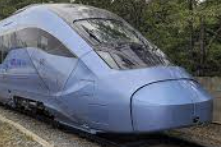

In [5]:
# 1. Get all image paths 
image_path = Path('trains')
image_path_list = list(image_path.glob("*/*.png"))

# 2. Pick a random image 
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem 
print(image_class) 

# 4. Open image 
img = Image.open(random_image_path) 

# 5. Print metadata 
print(f'Random image path: {random_image_path}')
print(f'Image class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 220.5, 146.5, -0.5)

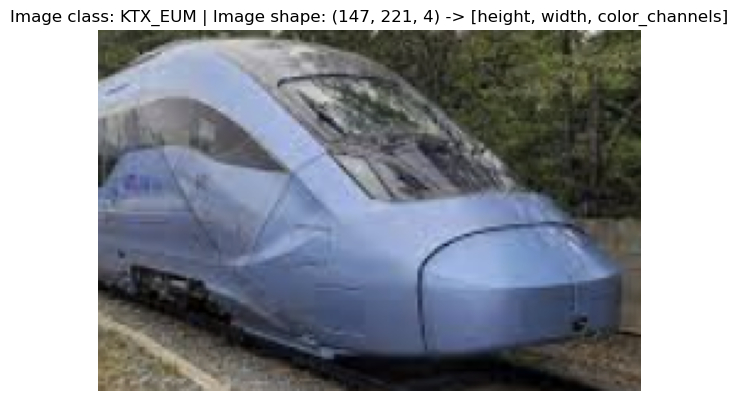

In [6]:
#Turn the image into an array 
img_as_array = np.array(img) 

#Plot the image with matplotlib 
plt.figure(figsize=(7,7)) 
plt.imshow(img_as_array) 
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]')
plt.axis(False)

In [7]:
# Write a transform for image 
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal 
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into Tensor 
    transforms.ToTensor()
])

In [8]:
data_transform(img)

tensor([[[0.2314, 0.2431, 0.2392,  ..., 0.2941, 0.2941, 0.3098],
         [0.2510, 0.2706, 0.2392,  ..., 0.2471, 0.2784, 0.2941],
         [0.3294, 0.3137, 0.3176,  ..., 0.2667, 0.2902, 0.2784],
         ...,
         [0.3451, 0.3333, 0.3608,  ..., 0.5098, 0.5098, 0.5373],
         [0.3451, 0.3490, 0.3333,  ..., 0.5686, 0.5137, 0.5176],
         [0.3529, 0.3333, 0.3176,  ..., 0.5569, 0.5333, 0.4667]],

        [[0.2431, 0.2627, 0.2549,  ..., 0.3059, 0.3059, 0.3216],
         [0.2667, 0.2863, 0.2588,  ..., 0.2588, 0.2902, 0.3059],
         [0.3451, 0.3294, 0.3333,  ..., 0.2784, 0.3020, 0.2902],
         ...,
         [0.2902, 0.2824, 0.3137,  ..., 0.4627, 0.4588, 0.4824],
         [0.2941, 0.3020, 0.2902,  ..., 0.5176, 0.4549, 0.4627],
         [0.3176, 0.3059, 0.2941,  ..., 0.5020, 0.4745, 0.4039]],

        [[0.1451, 0.1569, 0.1490,  ..., 0.2431, 0.2353, 0.2353],
         [0.1608, 0.1725, 0.1412,  ..., 0.2039, 0.2275, 0.2431],
         [0.2235, 0.2039, 0.2000,  ..., 0.2039, 0.2353, 0.

In [9]:
def plot_transformed_images(image_paths: list,transform,n=3,seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths,k=n) 
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)
        
            # Transform and plot target image 
            transformed_image = transform(f).permute(1,2,0) #we will need to change
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis('off')

            fig.suptitle(f'Class: {image_path.parent.stem}',fontsize=16)

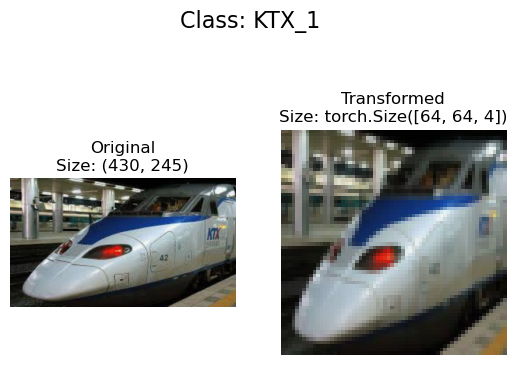

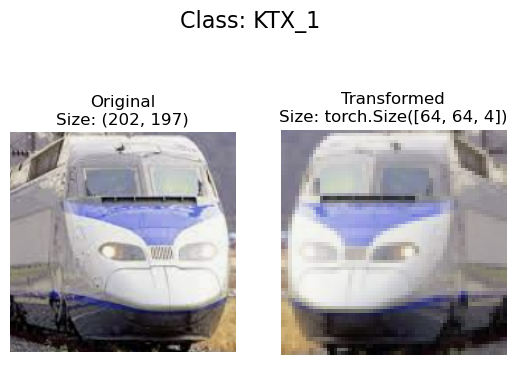

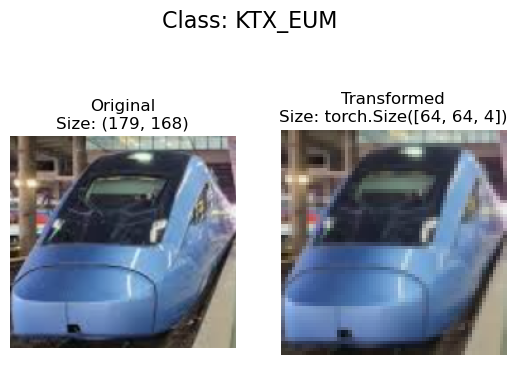

In [10]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [11]:
# Use ImageFolder 
from torchvision import datasets 
train_dir = 'trains'
test_dir = 'tests'
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for data
                                  target_transform=None) #transform for label
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) 

In [12]:
class_names = train_data.classes 
class_names

['KTX_1', 'KTX_EUM', 'KTX_Sancheon', 'SRT']

In [13]:
# get class names as dict 
class_dict = train_data.class_to_idx
class_dict

{'KTX_1': 0, 'KTX_EUM': 1, 'KTX_Sancheon': 2, 'SRT': 3}

In [14]:
# Index on the train_data Dataset to get a single image datasets
train_data[0]

(tensor([[[0.1608, 0.1608, 0.1608,  ..., 0.2235, 0.2235, 0.2157],
          [0.1412, 0.1569, 0.1765,  ..., 0.2353, 0.2275, 0.2078],
          [0.1294, 0.1451, 0.1569,  ..., 0.2235, 0.2157, 0.1922],
          ...,
          [0.4863, 0.4706, 0.4235,  ..., 0.6863, 0.6824, 0.6588],
          [0.3020, 0.2980, 0.2588,  ..., 0.6902, 0.6667, 0.6353],
          [0.0667, 0.0627, 0.0510,  ..., 0.6353, 0.6314, 0.5725]],
 
         [[0.1725, 0.1686, 0.1686,  ..., 0.2196, 0.2196, 0.2118],
          [0.1490, 0.1647, 0.1843,  ..., 0.2275, 0.2235, 0.2039],
          [0.1412, 0.1569, 0.1686,  ..., 0.2196, 0.2118, 0.1882],
          ...,
          [0.3686, 0.3451, 0.3137,  ..., 0.6314, 0.6235, 0.6000],
          [0.2235, 0.2157, 0.1882,  ..., 0.6392, 0.6157, 0.5804],
          [0.0353, 0.0235, 0.0196,  ..., 0.5961, 0.5882, 0.5333]],
 
         [[0.1686, 0.1647, 0.1647,  ..., 0.2431, 0.2471, 0.2392],
          [0.1451, 0.1608, 0.1843,  ..., 0.2549, 0.2471, 0.2275],
          [0.1333, 0.1490, 0.1608,  ...,

In [15]:
# Turn train and test datasets into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False
                            )

In [16]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size
print(f'Image shape: {img.shape} -> [batch_size,color_channels,height,width]')
print(f'Label shape: {label.shape}') 

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size,color_channels,height,width]
Label shape: torch.Size([1])


In [17]:
print(len(train_dataloader))
print(len(test_dataloader))


80
40


# 2. CNN Model Creation

In [18]:
import torch
from torch import nn
import torch.nn.functional as F

class KTX_Classifier(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(KTX_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(64*32*32, 128)  # Assuming input image size is 64x64
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [19]:
def train(model, train_dataloader, criterion, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)
        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()

    accuracy = 100 * correct / total
    return train_loss/len(train_dataloader), accuracy

def test(model, test_dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return test_loss/len(test_dataloader), accuracy

In [20]:
class_names

['KTX_1', 'KTX_EUM', 'KTX_Sancheon', 'SRT']

In [21]:
# Set the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = KTX_Classifier(input_channels=3, num_classes=4).to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [22]:
def plot_metrics(train_loss, test_loss, train_accuracy, test_accuracy):
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'r', label='Training loss')
    plt.plot(epochs, test_loss, 'b', label='Test loss')
    plt.title('Training and Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/loss.png')
    plt.show()

    plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
    plt.title('Training and Test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('images/accuracy.png')
    plt.show()

# 3. Training & Testing

In [23]:
train_loss_list = []
test_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

num_epochs = 30

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_dataloader, criterion, optimizer)
    test_loss, test_accuracy = test(model, test_dataloader, criterion)

    print(f'Epoch {epoch} | Train Loss: {train_loss} | Train Accuracy: {train_accuracy}% | Test Loss: {test_loss} | Test Accuracy: {test_accuracy}%')
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

Epoch 0 | Train Loss: 1.4963414631783962 | Train Accuracy: 33.75% | Test Loss: 1.2875035524368286 | Test Accuracy: 42.5%
Epoch 1 | Train Loss: 1.373269183933735 | Train Accuracy: 35.0% | Test Loss: 1.164049420505762 | Test Accuracy: 42.5%
Epoch 2 | Train Loss: 1.0743975362041964 | Train Accuracy: 66.25% | Test Loss: 0.6309382536448538 | Test Accuracy: 92.5%
Epoch 3 | Train Loss: 1.1365171111650851 | Train Accuracy: 57.5% | Test Loss: 0.666709030373022 | Test Accuracy: 92.5%
Epoch 4 | Train Loss: 0.7408379740771828 | Train Accuracy: 76.25% | Test Loss: 0.39744371054712246 | Test Accuracy: 92.5%
Epoch 5 | Train Loss: 0.6570568833949995 | Train Accuracy: 81.25% | Test Loss: 0.22911867623217788 | Test Accuracy: 92.5%
Epoch 6 | Train Loss: 0.58440397828291 | Train Accuracy: 76.25% | Test Loss: 0.17204921269505888 | Test Accuracy: 92.5%
Epoch 7 | Train Loss: 0.3688851647655553 | Train Accuracy: 88.75% | Test Loss: 0.1342504566443889 | Test Accuracy: 95.0%
Epoch 8 | Train Loss: 0.748178377951

# 4 Plotting Accuracy & Loss Curve

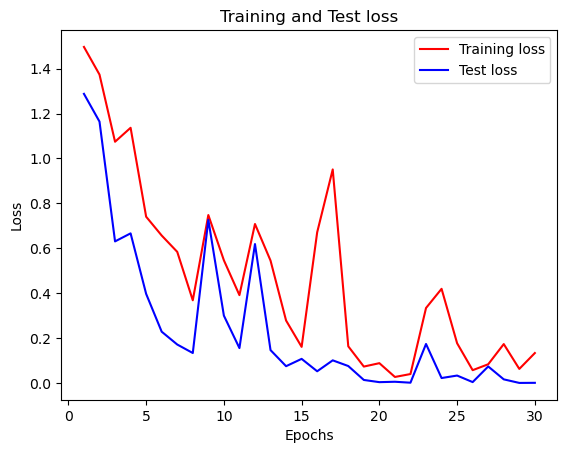

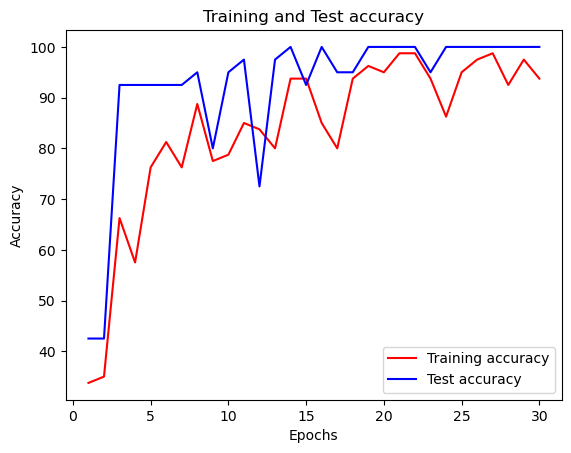

In [24]:
plot_metrics(train_loss_list, test_loss_list, train_accuracy_list, test_accuracy_list)

# 5. Predicting with Given Images

In [25]:
def make_predictions(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare the sample (add a batch dimension and pass to target)
            sample = torch.unsqueeze(sample,dim=0).to(device)

            #Forward pass (model outputs raw logits)
            pred_logits = model(sample) 

            #Get prediction probability (logit-> prediction probability)
            pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

            #Get pred_prob off the GPU for further calculations 
            pred_probs.append(pred_prob.cpu()) 
        
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [26]:
len(test_data)

40

In [27]:
import random
random.seed(42) 
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data),k=15):
    test_samples.append(sample)
    test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([3, 64, 64])

(-0.5, 63.5, 63.5, -0.5)

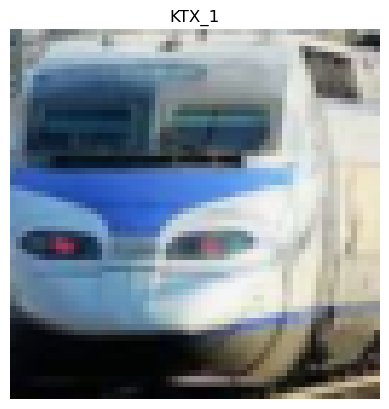

In [28]:
plt.imshow(test_samples[0].permute(1, 2, 0).squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [29]:
# Make Predictions
pred_probs = make_predictions(model=model,
                             data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.0000e+00, 6.1630e-23, 7.9217e-15, 1.9257e-26],
        [1.0000e+00, 1.6811e-09, 3.3853e-12, 5.2391e-14]])

In [30]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 0, 1, 1, 1, 0, 0, 0, 2, 3, 0, 0, 3, 3, 1])

In [31]:
test_labels

[0, 0, 1, 1, 1, 0, 0, 0, 2, 3, 0, 0, 3, 3, 1]

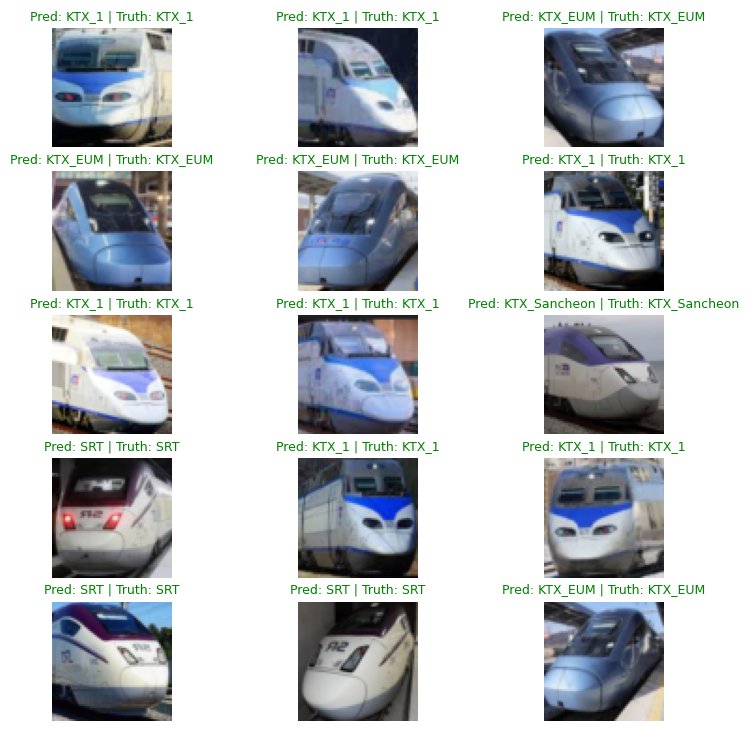

In [32]:
plt.figure(figsize=(9,9))
nrows = 5
ncols = 3 

for i,sample in enumerate(test_samples):
    #Create a subplot 
    plt.subplot(nrows,ncols,i+1)

    #Plot target image 
    plt.imshow(sample.permute(1, 2, 0).squeeze())

    #Find the prediction in text form 
    pred_label = class_names[pred_classes[i]]

    #Get truth label
    truth_label = class_names[test_labels[i]]

    #Create a title for plot 
    title_text = f'Pred: {pred_label} | Truth: {truth_label}' 

    #Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text,fontsize=9,c='g') #Green text if correct
    else:
        plt.title(title_text,fontsize=9,c='r')
    
    plt.axis(False)
    plt.savefig('images/predictions.png')

In [33]:
import mlxtend 
print(mlxtend.__version__)

0.22.0


In [34]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix 
from tqdm.auto import tqdm 

Making predictions...:   0%|          | 0/40 [00:00<?, ?it/s]

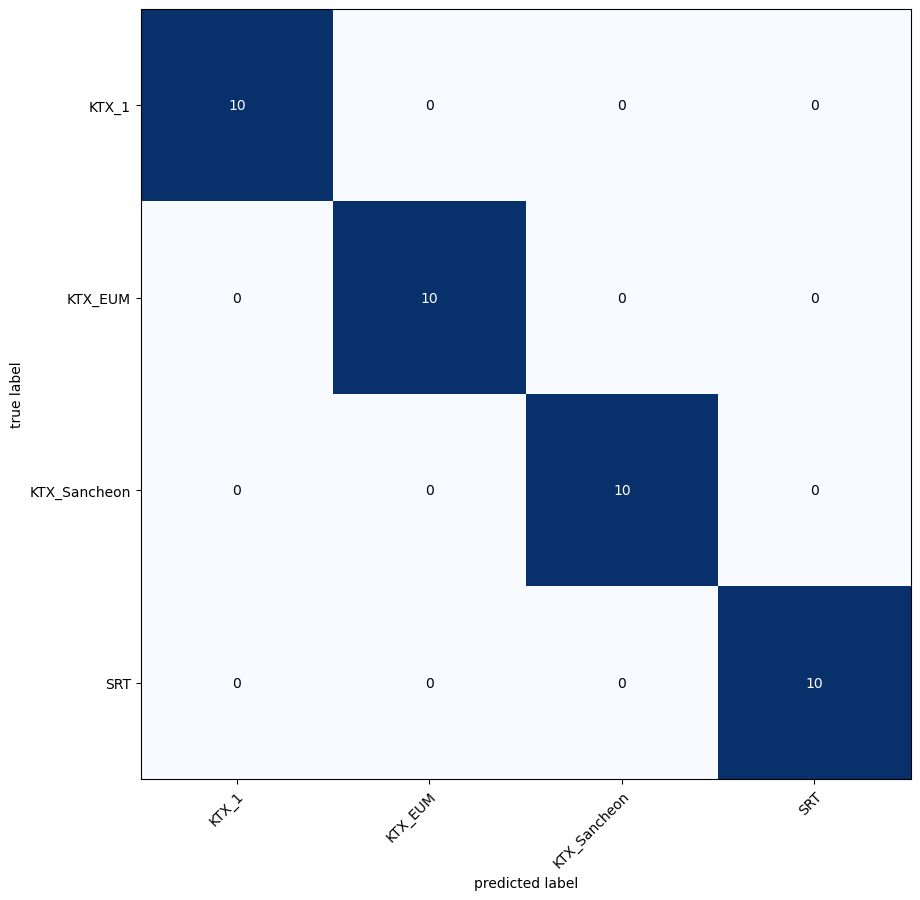

In [35]:
#1. Make predictions with trained model and collect targets
y_preds = []
y_true = []
model.eval()
with torch.no_grad():
    for X,y in tqdm(test_dataloader,desc='Making predictions...'):
        #Send data and targets to target device 
        X,y = X.to(device),y.to(device) 
        #Do forward pass 
        y_logits = model(X) 
        #Turn predictions from logits -> prediction probabilities 
        y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
        #Put prediction on CPU for evaluation 
        y_preds.append(y_pred.cpu().unsqueeze(0)) 
        y_true.append(y.cpu().unsqueeze(0))

#Concatenate list of predictions into a Tensor
y_pred_tensor = torch.cat(y_preds, dim=0)
y_true_tensor = torch.cat(y_true, dim=0)

#2. Setup confusion instances
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

#3. Plot confusion matrix 
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,10)
)


In [ ]:
fig.savefig('images/confusion_matrix.png')